In [7]:
from __future__ import print_function
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 

# Load the training data
iris = load_iris()
X = iris.data[:, 2:4]
print('selected features: %2s' %iris.feature_names[2:4])
y = iris.target

# split data into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standerdize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

selected features: ['petal length (cm)', 'petal width (cm)']


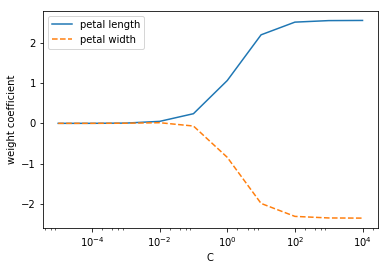

In [8]:
# Deciding whether to apply strong regularization or not
# Strong value of regularization -> lower value of weight coefficients -> less relation btwn variables 
weights, params = [], []
for c in range(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [9]:
# Train perceptron
lr = LogisticRegression(C=10, penalty='l1')
lr.fit(X_train_std, y_train)

# Fit the testing dataset to see how well our model converge
y_pred = lr.predict(X_test_std)

# Check the accuracy of our model
print('Accuracy: % .2f' % accuracy_score(y_pred, y_test))
print('Misclassified samples : %d' % (y_test != y_pred).sum())

Accuracy:  0.98
Misclassified samples : 1


Confusion matrix, without normalization
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


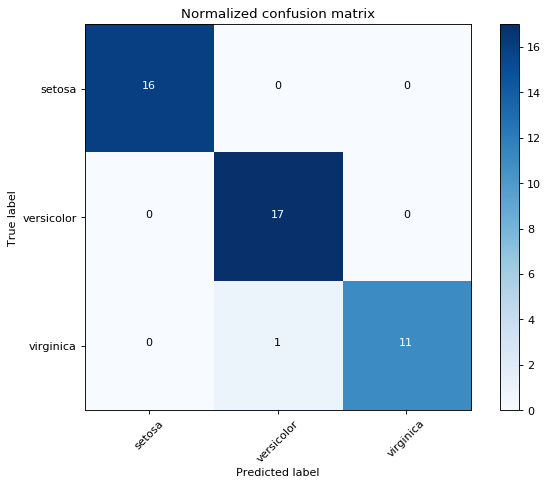

In [11]:
# Build a confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = iris.target_names

cnf_matrix = confusion_matrix(y_pred, y_test)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix')
plt.show()

In [169]:
# Debugging algorithm to improve performance of the model
# 1) Feature selection techniques
feat_labels = iris.feature_names[:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

In [170]:
indices = np.argsort(importances)[::-1]
for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) sepal length (cm)              0.501294
 2) sepal width (cm)               0.498706


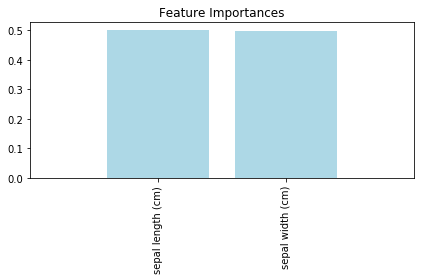

In [171]:
plt.title('Feature Importances')
plt.bar(range(X_train_std.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train_std.shape[1]), np.array(feat_labels)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [172]:
# 2) Removeing zero variance features
from sklearn.feature_selection import VarianceThreshold

iris = load_iris()
X = iris.data[:, 0:4]
print('selected features: %2s' %iris.feature_names[0:4])
y = iris.target

# split data into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
selector = VarianceThreshold()
selector.fit_transform(X_train)
print(selector.get_support(indices=True))

In [189]:
# Feature extraction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
lr = LogisticRegression(C=3, penalty='l1')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

# Fit the testing dataset to see how well our model converge
y_pred = lr.predict(X_test_pca)

# Check the accuracy of our model
print('Accuracy: % .2f' % accuracy_score(y_pred, y_test))
print('Misclassified samples : %d' % (y_test != y_pred).sum())

Accuracy:  0.96
Misclassified samples : 2
